Using Theano backend.
Using gpu device 0: GeForce GT 650M (CNMeM is disabled, cuDNN 5105)
C:\Users\Jack\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Jack\Anaconda2\lib\site-packages\matplotlib\__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Loading data..
(2000L,)
Data loaded !
Test train Shape: 
(1000L, 3L, 227L, 227L)
(1000L, 3L, 227L, 227L)
Running Fold 1 / 2
Weights for "conv_5" are loaded
Weights for "conv_5_1" are loaded
Weights for "conv_5_2" are loaded
Weights for "dense_1" are loaded
Weights for "dense_2" are loaded
Extracting features..
Deep features extracted  (4096L,)

Training SVM..
SVM acc: : 71.90%


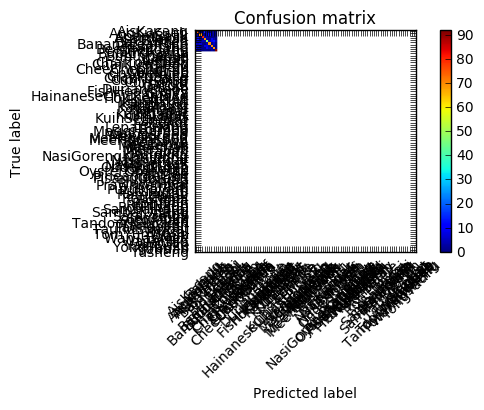

                      precision    recall  f1-score   support

           AisKacang       0.69      0.75      0.72       100
           AngKuKueh       0.66      0.75      0.70       100
           ApamBalik       0.80      0.70      0.75       100
           Asamlaksa       0.87      0.80      0.83       100
              Bahulu       0.66      0.69      0.68       100
           Bakkukteh       0.56      0.50      0.53       100
      BananaLeafRice       0.73      0.69      0.71       100
             Bazhang       0.70      0.70      0.70       100
         BeefRendang       0.59      0.69      0.64       100
           BingkaUbi       0.96      0.92      0.94       100

         avg / total       0.72      0.72      0.72      1000



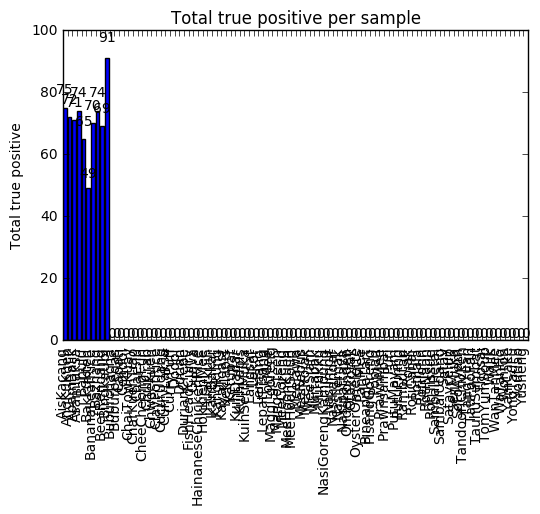

[75 72 71 74 65 49 70 74 69 91  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 97  99  95  98  97  95  97 100  99 100   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
Top-1 Accuracy: 71.0%
Top-5 Accuracy: 97.7%
Test train Shape: 
(1000L, 3L, 227L, 227L)
(1000L, 3L, 227L, 227L)
Running Fold 2 / 2
Weights for "conv_5" are loaded
Weights for "conv_5_1" are loaded
Weights for "conv_5_2" are loaded
Weights for "dense_1" are loaded
Weights for "dense_2" are

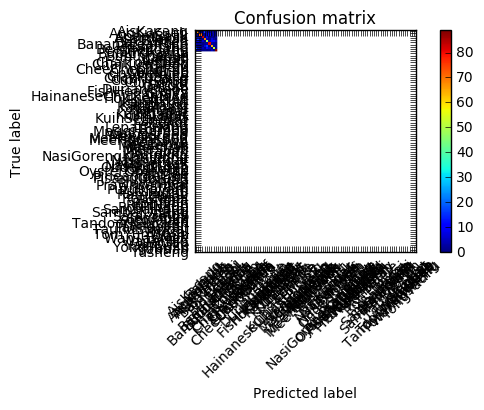

                      precision    recall  f1-score   support

           AisKacang       0.60      0.73      0.66       100
           AngKuKueh       0.67      0.68      0.68       100
           ApamBalik       0.86      0.72      0.78       100
           Asamlaksa       0.85      0.83      0.84       100
              Bahulu       0.69      0.69      0.69       100
           Bakkukteh       0.49      0.51      0.50       100
      BananaLeafRice       0.76      0.81      0.79       100
             Bazhang       0.65      0.64      0.64       100
         BeefRendang       0.58      0.52      0.55       100
           BingkaUbi       0.91      0.89      0.90       100

         avg / total       0.71      0.70      0.70      1000



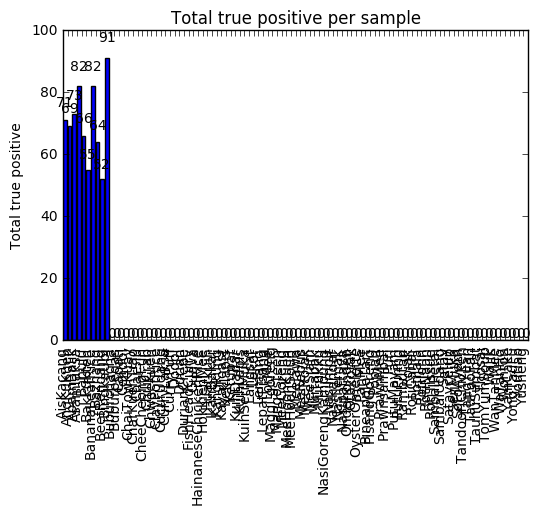

[71 69 73 82 66 55 82 64 52 91  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 97 100 100  98  96 100  94  93  96  99   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
Top-1 Accuracy: 70.5%
Top-5 Accuracy: 97.3%
Average acc : 70.75%


In [1]:
from keras.optimizers import SGD
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.cross_validation import StratifiedKFold
from keras.utils import np_utils

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import svm

import h5py as h5
import numpy as np
import time

import config
import util

fold_count = 1

def save_bottleneck67_features(X_train, X_test, y_train, y_test, pretrained_weights):
    model = util.load_alexnet_model_finetune567(weights_path=config.alexnet_weights_path, nb_class=config.nb_class, top_model_weight_path="../dataset/alex_finetune567_weights"+ str(fold_count) +".h5")
    print "Extracting features.."
    bottleneck_features_train = model.predict(X_train)
    np.save(open('alex_bottleneck567_features_train' + str(fold_count) + '.npy', 'wb'), bottleneck_features_train)

    bottleneck_features_validation = model.predict(X_test)
    np.save(open('alex_bottleneck567_features_validation' + str(fold_count) + '.npy', 'wb'), bottleneck_features_validation)
    print "Deep features extracted ", bottleneck_features_train.shape[1:]
                                               
def train_svm(y_train, y_test):
    X_train = np.load(open('alex_bottleneck567_features_train' + str(fold_count) + '.npy' , 'rb'))
    X_test = np.load(open('alex_bottleneck567_features_validation' + str(fold_count) + '.npy', 'rb'))
    
    print "\nTraining SVM.."
    clf = svm.SVC(kernel='linear', probability=True)
    clf.fit(X_train, y_train.ravel())
    score = clf.score(X_test, y_test.ravel())
    print("SVM %s: %.2f%%" % ("acc: ", score*100))
    
    y_pred = clf.predict(X_test)
    target_names = ['AisKacang' , 'AngKuKueh' , 'ApamBalik' , 'Asamlaksa' , 'Bahulu' , 'Bakkukteh',
     'BananaLeafRice' , 'Bazhang' , 'BeefRendang' , 'BingkaUbi' , 'Buburchacha',
     'Buburpedas' , 'Capati' , 'Cendol' , 'ChaiTowKuay' , 'CharKuehTiao' , 'CharSiu',
     'CheeCheongFun' , 'ChiliCrab' , 'Chweekueh' , 'ClayPotRice' , 'CucurUdang',
     'CurryLaksa' , 'CurryPuff' , 'Dodol' , 'Durian' , 'DurianCrepe' , 'FishHeadCurry',
     'Guava' , 'HainaneseChickenRice' , 'HokkienMee' , 'Huatkuih' , 'IkanBakar',
     'Kangkung' , 'KayaToast' , 'Keklapis' , 'Ketupat' , 'KuihDadar' , 'KuihLapis',
     'KuihSeriMuka' , 'Langsat' , 'Lekor' , 'Lemang' , 'LepatPisang' , 'LorMee',
     'Maggi goreng' , 'Mangosteen' , 'MeeGoreng' , 'MeeHoonKueh' , 'MeeHoonSoup',
     'MeeJawa' , 'MeeRebus' , 'MeeRojak' , 'MeeSiam' , 'Murtabak' , 'Murukku',
     'NasiGorengKampung' , 'NasiImpit' , 'Nasikandar' , 'Nasilemak' , 'Nasipattaya',
     'Ondehondeh' , 'Otakotak' , 'OysterOmelette' , 'PanMee' , 'PineappleTart',
     'PisangGoreng' , 'Popiah' , 'PrawnMee' , 'Prawnsambal' , 'Puri' , 'PutuMayam',
     'PutuPiring' , 'Rambutan' , 'Rojak' , 'RotiCanai' , 'RotiJala' , 'RotiJohn',
     'RotiNaan' , 'RotiTissue' , 'SambalPetai' , 'SambalUdang' , 'Satay' , 'Sataycelup',
     'SeriMuka' , 'SotoAyam' , 'TandooriChicken' , 'TangYuan' , 'TauFooFah',
     'TauhuSumbat' , 'Thosai' , 'TomYumSoup' , 'Wajik' , 'WanTanMee' , 'WaTanHo' , 'Wonton',
     'YamCake' , 'YongTauFu' , 'Youtiao' , 'Yusheng']
    cm = confusion_matrix(y_test, y_pred)
    util.plot_confusion_matrix(cm)
    #plt.savefig('cm_deep_feaures'+ str(fold_count) +'.png', dpi=300, aspect='auto')
    plt.show()
    plt.gcf().clear()
    f1_score(y_test, y_pred,average=None)
    print(classification_report(y_test, y_pred,target_names=target_names))
      
    #scores = clf.decision_function(X_test)
      # Get Top-5
    #indices = (-scores).argsort()[:, :5] # take top 5 results
    
    scores = clf.predict_proba(X_test)
    n = 5
    indices = np.argsort(scores)[:,:-n-1:-1]
    # Get accuracy
    top1 = 0.0
    top5 = 0.0
    correct_predict_top1 = np.zeros((config.nb_class,), dtype=np.int)
    correct_predict_top5 = np.zeros((config.nb_class,), dtype=np.int)
    
    for image_index, index_list in enumerate(indices):
        if y_test[image_index] == index_list[0]:
            top1 += 1.0
        if y_test[image_index] in index_list:
            top5 += 1.0
            
    image_index = None
    index_list = None
    start_index = 0
    end_index = 99
    
    for class_label in range(0,10):
        for image_index in range(start_index,end_index+1):
            if y_test[image_index] == indices[image_index][0]:
                correct_predict_top1[class_label] += 1
            if y_test[image_index] in indices[image_index]:
                correct_predict_top5[class_label] += 1
        start_index += 100
        end_index += 100
    
    y_pos = np.arange(len(target_names))
    performance = correct_predict_top1

    rects1 = plt.bar(y_pos, performance)
    plt.xticks(y_pos, target_names, rotation='vertical')
    plt.ylabel('Total true positive')
    plt.title('Total true positive per sample')
    
    autolabel(rects1)
    #plt.savefig('barchart_deep_feaures'+ str(fold_count) +'.png', dpi=300, aspect='auto')
    plt.show()
    plt.gcf().clear()
    
    print correct_predict_top1
    print correct_predict_top5
    
    print('Top-1 Accuracy: ' + str(top1 / len(y_test) * 100.0) + '%')
    print('Top-5 Accuracy: ' + str(top5 / len(y_test) * 100.0) + '%')

    return top1/len(y_test)

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

if __name__ == "__main__":
    total_scores = 0
    print "Loading data.."
    data, labels, lz = util.load_data()
    data = data.astype('float32')
    data /= 255
    lz = np.array(lz)
    print lz.shape
    print "Data loaded !"
    
    skf = StratifiedKFold(y=lz, n_folds=config.n_folds, shuffle=False)
    
    for i, (train, test) in enumerate(skf):
        print "Test train Shape: "
        print data[train].shape
        print data[test].shape
        print ("Running Fold %d / %d" % (i+1, config.n_folds))
        
        save_bottleneck67_features(data[train], data[test],labels[train], labels[test], config.alexnet_weights_path)
        scores = train_svm(labels[train], labels[test])
        total_scores = total_scores + scores
        fold_count = fold_count + 1
        
    print("Average acc : %.2f%%" % (total_scores/config.n_folds*100))

  